In [311]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [312]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [313]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [314]:
X = iris.data
Y = iris.target

In [315]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [316]:
from keras.utils import to_categorical

In [317]:
Y = to_categorical(Y)

In [318]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [319]:
# split into train and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [320]:
#create the keras model
model = Sequential()

In [321]:
model.add(Dense(32, input_dim = 4,activation = 'relu')) # input_dim = input dimesion
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

## Compile model

In [322]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [323]:
# Train the model
result = model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_data=(X_test, Y_test))


Epoch 1/20
8/8 [==============================] - 1s 21ms/step - loss: 1.9034 - accuracy: 0.3333 - val_loss: 1.3478 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 1.2264 - accuracy: 0.4500 - val_loss: 0.9715 - val_accuracy: 0.7000
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 0.9743 - accuracy: 0.6500 - val_loss: 0.9018 - val_accuracy: 0.7000
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.8930 - accuracy: 0.6583 - val_loss: 0.8332 - val_accuracy: 0.7000
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.8122 - accuracy: 0.6583 - val_loss: 0.7606 - val_accuracy: 0.7000
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.7432 - accuracy: 0.6583 - val_loss: 0.7064 - val_accuracy: 0.7000
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.6583 - val_loss: 0.6628 - val_accuracy: 0.7333
Epoch 8/20
8/8 [=================

In [324]:
loss, accuracy = model.evaluate(X_test, Y_test)


1/1 [==============================] - 0s 18ms/step - loss: 0.2913 - accuracy: 0.9667


In [325]:
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 47ms/step


array([[0.02979873, 0.57432127, 0.39587995],
       [0.9819359 , 0.00742677, 0.01063734],
       [0.00219387, 0.08599114, 0.9118149 ],
       [0.02869017, 0.53673893, 0.4345709 ],
       [0.02346859, 0.5569864 , 0.41954497],
       [0.9682178 , 0.01363571, 0.01814659],
       [0.09087592, 0.6105048 , 0.2986193 ],
       [0.0087194 , 0.28188297, 0.7093977 ],
       [0.01995812, 0.36530796, 0.61473393],
       [0.04896066, 0.66187155, 0.2891677 ],
       [0.01317971, 0.36879888, 0.6180215 ],
       [0.9603988 , 0.01715039, 0.02245082],
       [0.98300016, 0.00659492, 0.01040492],
       [0.9626635 , 0.01626359, 0.021073  ],
       [0.9843194 , 0.00606653, 0.00961411],
       [0.03034432, 0.6184702 , 0.35118544],
       [0.00516301, 0.16101608, 0.83382094],
       [0.04687455, 0.6315356 , 0.32158983],
       [0.0325703 , 0.5456896 , 0.4217401 ],
       [0.00552737, 0.1537198 , 0.84075284],
       [0.95883733, 0.01821127, 0.02295144],
       [0.0163073 , 0.3806774 , 0.60301524],
       [0.

In [326]:
import matplotlib.pyplot as plt

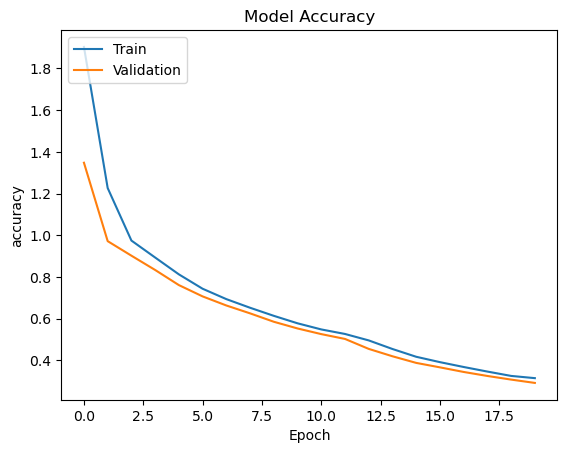

In [327]:
# Plot the training and validation accuracy over epochs
plt.plot(result.history['loss']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(result.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

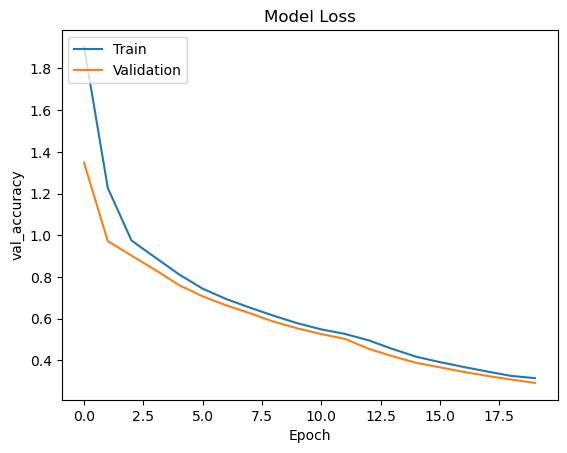

In [328]:
# Plot the training and validation loss over epochs
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()